<a href="https://colab.research.google.com/github/lucasocarvalhos/RECSYS/blob/main/Intro_a_sistemas_de_recomenda%C3%A7%C3%A3o_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

filmes = pd.read_csv('movies.csv')

filmes.columns = ['filmeId', 'titulo', 'genero']

filmes.set_index('filmeId', inplace = True)

filmes.head()

,titulo,genero
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv('ratings.csv')

notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Primeira tentativa de recomendação - Por popularidade

A primeira tentativa de recomendação consiste em descobrir quais são os filmes mais populares, ou seja, os filmes vistos pela maior quantidade de pessoas.

Estamos considerando que, se o filme é muito popular, então muitas pessoas que ainda não o viram terão interesse em assisti-lo em algum momento.

In [4]:
# Quantas vezes o filme foi visto

total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [5]:
filmes.loc[356] # O filme mais popular

titulo         Forrest Gump (1994)
genero    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [6]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,genero,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [7]:
filmes.sort_values('total_de_votos', ascending = False).head() # Top 5 de filmes mais vistos que recomendaríamos a alguém

,titulo,genero,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [8]:
# Média das notas de cada filme

notas_medias = notas.groupby('filmeId')['nota'].mean()

filmes['notas_medias'] = notas_medias

In [9]:
filmes.sort_values('total_de_votos', ascending = False).head(10)

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


Conclui-se do dataframe acima que, mesmo que um filme tenha sido visto muitas vezes, isso não implica que muitas pessoas gostaram. Por exemplo, Jurassic Park foi visto mais vezes do que Schindler's List, porém as pessoas gostaram mais desse último.

## Segunda tentativa de recomendação - Por notas

In [10]:
filmes.sort_values('notas_medias', ascending = False).head(10)

# Existem filmes com apenas 1 voto e isso não é interessante para a análise

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [11]:
filmes_com_mais_de_25_votos = filmes.query('total_de_votos >= 25').sort_values('notas_medias', ascending = False)

filmes_com_mais_de_25_votos.head(10)

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,27.0,4.333333
898,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,29.0,4.310345
475,In the Name of the Father (1993),Drama,25.0,4.300000
1204,Lawrence of Arabia (1962),Adventure|Drama|War,45.0,4.300000
246,Hoop Dreams (1994),Documentary,29.0,4.293103
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
1235,Harold and Maude (1971),Comedy|Drama|Romance,26.0,4.288462
168252,Logan (2017),Action|Sci-Fi,25.0,4.280000


## Tentativa com base nos filmes já assistidos

In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]

filmes.loc[eu_assisti]

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


O Jumanji é do gênero Adventure/Children/Fantasy, então vamos buscar filmes de gênero semelhante

In [13]:
aventura_infantil_fantasia = filmes_com_mais_de_25_votos.drop(eu_assisti, errors = 'ignore').query('genero == "Adventure|Children|Fantasy"').sort_values('notas_medias', ascending = False)

aventura_infantil_fantasia # Filmes recomendados a quem assistiu Jumanji

,titulo,genero,total_de_votos,notas_medias
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294


## Abordagem de encontrar usuários 'similares'

- João deu nota 4 em Toy Story
- Maria deu nota 5 em Toy Story
- Paulo deu nota 3 em Toy Story
- Joana deu nota 3.5 em Toy Story

A similaridade entre os usuários pode ser medida através da distância entre as notas dadas.

x - y = distância

In [14]:
import matplotlib.pyplot as plt
import numpy as np

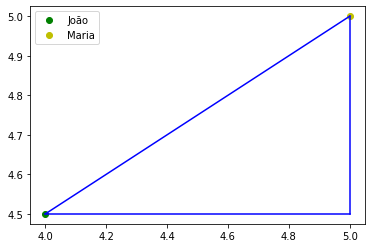

In [15]:
# Levando em consideração 2 filmes

joao = np.array([4, 4.5])

maria = np.array([5, 5])

plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.legend(['João', 'Maria'])

# A distância entre os pontos é o tamanho da hipotenusa do triângulo retângulo

plt.plot([4, 5], [4.5, 4.5], color = 'b', linestyle="-")
plt.plot([4, 5], [4.5, 5], color = 'b', linestyle="-")
plt.plot([5, 5], [5, 4.5], color = 'b', linestyle="-")

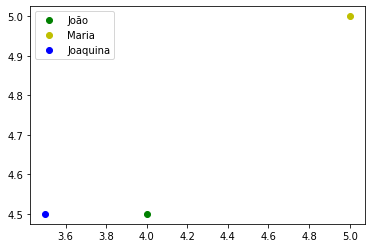

In [16]:
# Acrescentando mais 1 usuário

joaquina = np.array([3.5, 4.5])

plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.legend(['João', 'Maria', 'Joaquina'])

In [17]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a-b)

In [18]:
print(distancia_de_vetores(joao, maria))
print(distancia_de_vetores(joao, joaquina))

1.118033988749895
0.5


Teoricamente, Joaquina é mais parecida com João do que Maria é. Portanto, na hora de recomendar filmes para João, é preferível recomendar aqueles que Joaquina também curtiu.

In [19]:
def notas_do_usuario(usuarioId):
  notas_do_usuario = notas.query(f'usuarioId == {usuarioId}')
  notas_do_usuario = notas_do_usuario[['filmeId', 'nota']].set_index('filmeId')
  return notas_do_usuario

In [20]:
usuario_1 = notas_do_usuario(1)
usuario_4 = notas_do_usuario(4)

In [21]:
diferencas = usuario_1.join(usuario_4, lsuffix = '_usuario_1', rsuffix = '_usuario_4').dropna()
diferencas.head()

,nota_usuario_1,nota_usuario_4
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0


In [22]:
distancia_de_vetores(diferencas['nota_usuario_1'], diferencas['nota_usuario_4'])

11.135528725660043

In [23]:
def distancia_de_usuarios(usuarioId1, usuarioId2):
  notas1 = notas_do_usuario(usuarioId1)
  notas2 = notas_do_usuario(usuarioId2)

  diferencas = notas1.join(notas2, lsuffix = '_1', rsuffix = '_2').dropna()

  distancia = distancia_de_vetores(diferencas['nota_1'], diferencas['nota_2'])

  return [usuarioId1, usuarioId2, distancia]

In [24]:
distancia_de_usuarios(1, 4)

[1, 4, 11.135528725660043]

In [25]:
len(notas['usuarioId'].unique()) # Quantidade de usuários

610

In [26]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuarioId in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuarioId)
    distancias.append(informacoes)
  distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [27]:
distancia_de_todos(1).sort_values('distancia')

,voce,outra_pessoa,distancia
0,1,1,0.000000
577,1,578,0.000000
76,1,77,0.000000
84,1,85,0.000000
174,1,175,0.000000
...,...,...,...
473,1,474,18.594354
159,1,160,18.794946
216,1,217,19.646883
598,1,599,19.665960


É um pouco suspeito que a distância entre o usuário 1 e outros usuários tenha resultado em zero. Para investigar o caso, vamos olhar os dados de cada um.

In [28]:
notas_do_usuario(1).join(notas_do_usuario(578), lsuffix = '_1', rsuffix = '_578').dropna()

,nota_1,nota_578
filmeId,,


No caso acima, por exemplo, os dois usuários não assistiram a nenhum filme em comum. Não queremos esse tipo de ocorrência em nossa análise.

In [29]:
def distancia_de_usuarios(usuarioId1, usuarioId2, minimo = 5):
  notas1 = notas_do_usuario(usuarioId1)
  notas2 = notas_do_usuario(usuarioId2)

  diferencas = notas1.join(notas2, lsuffix = '_1', rsuffix = '_2').dropna()

  if (len(diferencas) < minimo):
    return [usuarioId1, usuarioId2, 100000]

  distancia = distancia_de_vetores(diferencas['nota_1'], diferencas['nota_2'])

  return [usuarioId1, usuarioId2, distancia]

In [30]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuarioId in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuarioId)
    distancias.append(informacoes)
  distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [31]:
def mais_proximos_de(voceId):
  distancias = distancia_de_todos(voceId).sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId)
  return distancias

In [32]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000


## Parâmetros para teste

In [33]:
def distancia_de_usuarios(usuarioId1, usuarioId2, minimo = 5):
  notas1 = notas_do_usuario(usuarioId1)
  notas2 = notas_do_usuario(usuarioId2)

  diferencas = notas1.join(notas2, lsuffix = '_1', rsuffix = '_2').dropna()

  if (len(diferencas) < minimo):
    return None

  distancia = distancia_de_vetores(diferencas['nota_1'], diferencas['nota_2'])

  return [usuarioId1, usuarioId2, distancia]

In [34]:
def distancia_de_todos(voce_id, n = None): # n é o número de usuários a serem analisados, em ordem
  distancias = []
  todos_os_usuarios = notas['usuarioId'].unique()
  if n:
    todos_os_usuarios = notas['usuarioId'].unique()[:n]
  for usuarioId in todos_os_usuarios:
    informacoes = distancia_de_usuarios(voce_id, usuarioId)
    distancias.append(informacoes)
  distancias = list(filter(None, distancias)) # filtro para retirar quem não tem nada haver com o usuário
  distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [35]:
def mais_proximos_de(voceId, n = None):
  distancias = distancia_de_todos(voceId, n = n).sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId)
  return distancias

In [36]:
mais_proximos_de(1, n = 50).head()

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776


In [37]:
def sugere_para(voce, n = None):

  notas_de_voce = notas_do_usuario(voce)

  similares = mais_proximos_de(voce, n = n)

  similar = similares.iloc[0].name

  notas_do_similar = notas_do_usuario(similar).drop(notas_de_voce.index, errors = 'ignore')

  recomendacoes = notas_do_similar.sort_values('nota', ascending = False)

  return recomendacoes.join(filmes)

A função acima pega o usuário mais similar a um determinado usuário X e seleciona os filmes que o mais similar já viu e que o outro usuário X não tenha visto. Desse modo, os filmes que o mais similar já viu e o usuário X não viu serão as melhores recomendações a este, ordenados da maior para menor nota.

In [38]:
sugere_para(1).head()

,nota,titulo,genero,total_de_votos,notas_medias
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


### Sugerindo com base em vários usuários

É importante não se limitar apenas ao mais similar que o usuário X, uma vez que ele pode apresentar gostos de nicho, isto é, filmes muito específicos que 'apenas' ele gosta e que o usuário X não tem motivos para gostar também.

In [39]:
def mais_proximos_de(voceId, n_mais_proximos = 10, n = None):
  distancias = distancia_de_todos(voceId, n = n).sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId)
  return distancias.head(n_mais_proximos)

In [40]:
def sugere_para(voce, n_mais_proximos = 10, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_assistiu = notas_de_voce.index
  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos,  n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending = False)
  return recomendacoes.join(filmes).head()

In [41]:
sugere_para(1) # Sugestões com base nos 10 usuários mais próximos

,nota,titulo,genero,total_de_votos,notas_medias
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


As sugestões mostradas ainda exibem filmes de nicho (filmes pouco famosos, com poucos votos, e que alguém gosta devido a um gosto extremamente pessoal).

Para isso, vamos filtrar para exibir apenas os filmes com mais de 25 votos.

In [42]:
notas = notas.set_index('filmeId').loc[filmes_com_mais_de_25_votos.index]

In [43]:
notas = notas.reset_index()

In [44]:
sugere_para(1) # Sugestões baseadas em filmes razoavelmente populares

,nota,titulo,genero,total_de_votos,notas_medias
filmeId,,,,,
5902,5.0,Adaptation (2002),Comedy|Drama|Romance,46.0,3.945652
1207,5.0,To Kill a Mockingbird (1962),Drama,58.0,4.120690
1028,5.0,Mary Poppins (1964),Children|Comedy|Fantasy|Musical,71.0,3.887324
5971,5.0,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy,37.0,3.959459
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277


### Refinando para quantidade mínima de usuários que assistiram ao filme

In [45]:
def mais_proximos_de(voceId, n_mais_proximos = 10, n = None):
  distancias = distancia_de_todos(voceId, n = n).sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId, errors = 'ignore')
  return distancias.head(n_mais_proximos)

In [51]:
def sugere_para(voce, n_mais_proximos = 10, n = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_assistiu = notas_de_voce.index
  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos,  n = n)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  aparicoes = notas_dos_similares.groupby('filmeId').count()[['nota']]
  filtro_minimo = n_mais_proximos/2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix = '_media_dos_usuarios', rsuffix = '_qntd_de_usuarios_que_assistiram')
  recomendacoes = recomendacoes.query(f'nota_qntd_de_usuarios_que_assistiram >= {filtro_minimo}')
  recomendacoes = recomendacoes.sort_values('nota_media_dos_usuarios', ascending = False)
  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_assistiu, errors = 'ignore')
  return recomendacoes.join(filmes).head()

In [52]:
sugere_para(1) # Sugestões com base também na quantidade de pessoas que assistiram

,nota_media_dos_usuarios,nota_qntd_de_usuarios_que_assistiram,titulo,genero,total_de_votos,notas_medias
filmeId,,,,,,
7153,4.700000,5,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
58559,4.700000,5,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
4993,4.666667,6,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
109487,4.583333,6,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
